In [1]:
import fnmatch
import face_recognition as fr

In [2]:
import os
from matplotlib import pyplot as plt
%matplotlib inline

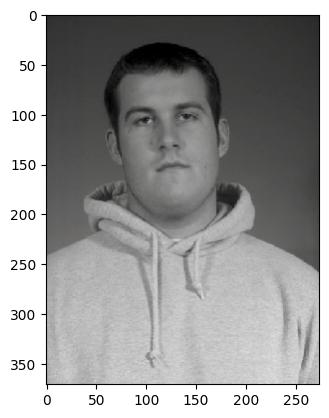

In [5]:
face = fr.load_image_file('./samplev1-1.jpeg')
plt.imshow(face)
plt.show()

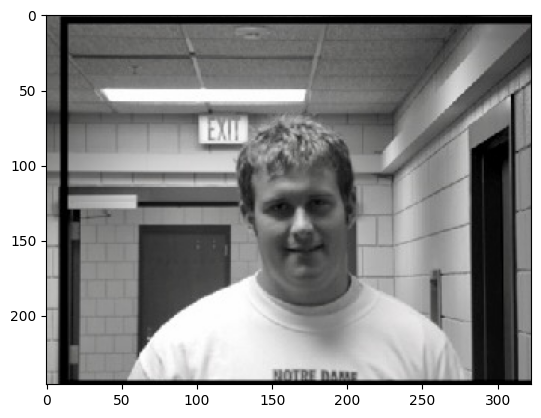

In [6]:
script = fr.load_image_file('./samplev1.jpeg')
plt.imshow(script)
plt.show()

In [7]:
faceLoc = fr.face_locations(face)    #locate where face is in picture
encodes = fr.face_encodings(face, faceLoc)  #apply face encoding 

encode = fr.face_encodings(script)[0]    #apply encoding to test image

matches = fr.compare_faces(encodes, encode) #match the two images and check same person or not

print(matches)

[True]


### Match with someone else

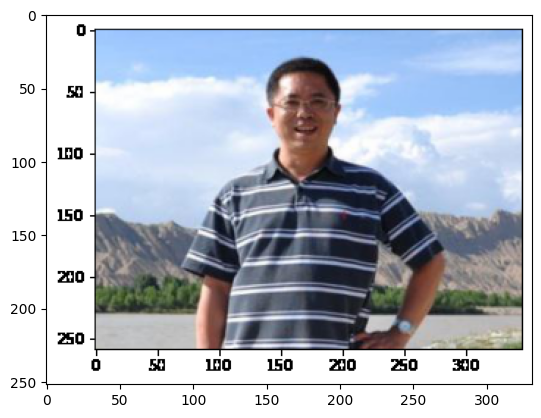

In [8]:
script2 = fr.load_image_file('./sample2.png')
plt.imshow(script2)
plt.show()

In [9]:
faceLoc = fr.face_locations(face)    #locate where face is in picture
encodes = fr.face_encodings(face, faceLoc)  #apply face encoding 

encode = fr.face_encodings(script2)[0]    #apply encoding to test image

matches = fr.compare_faces(encodes, encode) #match the two images and check same person or not

print(matches)

[False]


### example

In [15]:
# Load some images to compare against

import face_recognition 
known_obama_image = script #face_recognition.load_image_file("obama.jpg")
known_biden_image = script2 #face_recognition.load_image_file("biden.jpg")

# Get the face encodings for the known images
obama_face_encoding = face_recognition.face_encodings(known_obama_image)[0]
biden_face_encoding = face_recognition.face_encodings(known_biden_image)[0]

known_encodings = [
    obama_face_encoding,
    biden_face_encoding
]

# Load a test image and get encondings for it
image_to_test = face #face_recognition.load_image_file("obama2.jpg")
image_to_test_encoding = face_recognition.face_encodings(image_to_test)[0]

# See how far apart the test image is from the known faces
face_distances = face_recognition.face_distance(known_encodings, image_to_test_encoding)

for i, face_distance in enumerate(face_distances):
    print("The test image has a distance of {:.2} from known image #{}".format(face_distance, i))
    print("- With a normal cutoff of 0.6, would the test image match the known image? {}".format(face_distance < 0.6))
    print("- With a very strict cutoff of 0.5, would the test image match the known image? {}".format(face_distance < 0.5))
    print()

The test image has a distance of 0.49 from known image #0
- With a normal cutoff of 0.6, would the test image match the known image? True
- With a very strict cutoff of 0.5, would the test image match the known image? True

The test image has a distance of 0.75 from known image #1
- With a normal cutoff of 0.6, would the test image match the known image? False
- With a very strict cutoff of 0.5, would the test image match the known image? False

